In [1]:
# The Data Incubator
# Capstone Project
# Natural Language Processing and Knowledge Graphs
# Working Version: 03
# Purpose for Streamlit App Creation

# Python 3.9.7
# ba-cpstn local env

In [2]:
# common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pickle
%matplotlib inline


In [3]:
# typical natural language processing (nlp) libraries
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(1234) # set seed number to avoid random variation between consecutive runs
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Jen
[nltk_data]     Smo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Jen
[nltk_data]     Smo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# 1. Load and Cleaning up of Raw Data Signals

## 1.1 Load the Provided Q Data

In [4]:
localpath = "C:\\coding\\python\\tdi_dsf\\cpstn\\ntbk\\v03\\"
csv_data = "Q_Data_5K_v02_clean.csv"

In [5]:
# select only valid columns from supplied raw dataset
columns = [ 'signal num', 'content', 'regioncountry', 'audiences', 'title', 'sentiment', 'image', 'topics',
            'aisummary', 'likes', 'sitename', 'url', 'authorname', '@version', '@timestamp', 'id', 'language',
            'comments', 'type', 'publisheddate', 'organization', 'reposts', 'eocs', 'retrieveddate', 'verticals', 'dislikes']

In [6]:
# read the entire contents from provided raw dataset contained within columns

# df = pd.read_csv(localpath+csv_data, usecols=columns, encoding='unicode_escape', low_memory=False)
# df = pd.read_csv(localpath+csv_data, usecols=columns, encoding='UTF-8', encoding_errors='ignore', low_memory=False)
df = pd.read_csv(localpath + csv_data, usecols=columns, encoding='UTF-8', low_memory=False)

In [7]:
# keep only data that contains signal number from raw dataset
# previously ran, no need to re-run

# df = df[df['signal num'].apply(lambda x: str(x).isdigit())]

In [8]:
df.shape

(5000, 26)

## 1.2 Create and Inspect a 5K Subset Rows of Raw Data

In [9]:
df_5K = df.iloc[:5000,:] # keep first 5K records as a subset for development
df_5K.shape

(5000, 26)

In [10]:
df_5K[3500:3505]

,signal num,content,regioncountry,audiences,title,sentiment,image,topics,aisummary,likes,...,language,comments,type,publisheddate,organization,reposts,eocs,retrieveddate,verticals,dislikes
3500,3500,From student loan debt to unaffordable housing...,NaN,NaN,Sen. Elizabeth Warren Has A Plan For Everythin...,0.0,http://mediad.publicbroadcasting.net/p/shared/...,"[{""name"": ""Elizabeth Warren"", ""salience"": 0.19...",That prompted comedian Ashley Nicole Black to ...,NaN,...,en,NaN,Article,2019-05-20 13:48:32+00:00,NaN,NaN,"[{""tag"": ""outsiders welcome"", ""probability"": ""...",NaN,[],NaN
3501,3501,Trump campaign manager Brad Parscale posted a ...,US,NaN,Watch: Trump War Room Features Brutal Video of...,-3.0,https://media.breitbart.com/media/2019/09/joe-...,"[{""name"": ""Features"", ""salience"": 1}, {""name"":...",President Donald Trump's campaign highlighted ...,NaN,...,en-us,NaN,Article,2019-09-17 16:12:31+00:00,NaN,NaN,"[{""tag"": ""refreshed classics"", ""probability"": ...",2019-09-17 17:13:18+00:00,"[{""tag"": ""food and beverage"", ""probability"": 0...",NaN
3502,3502,From student loan debt to unaffordable housing...,NaN,NaN,Sen. Elizabeth Warren Has A Plan For Everythin...,0.0,http://mediad.publicbroadcasting.net/p/shared/...,"[{""name"": ""Elizabeth Warren"", ""salience"": 0.19...",That prompted comedian Ashley Nicole Black to ...,NaN,...,en,NaN,Article,2019-05-20 13:25:17+00:00,NaN,NaN,"[{""tag"": ""outsiders welcome"", ""probability"": ""...",NaN,[],NaN
3503,3503,From student loan debt to unaffordable housing...,NaN,NaN,Sen. Elizabeth Warren Has A Plan For Everythin...,0.0,http://mediad.publicbroadcasting.net/p/shared/...,"[{""name"": ""Elizabeth Warren"", ""salience"": 0.19...",That prompted comedian Ashley Nicole Black to ...,NaN,...,en,NaN,Article,2019-05-20 12:05:00+00:00,NaN,NaN,"[{""tag"": ""outsiders welcome"", ""probability"": ""...",NaN,[],NaN
3504,3504,"By NASSER KARIMI and JON GAMBRELL\nTEHRAN, Ira...",NaN,NaN,Iran Revolutionary Guard shoots down U.S. dron...,0.0,https://www.presstelegram.com/wp-content/uploa...,"[{""name"": ""Revolutionary Guard"", ""salience"": 0...","By NASSER KARIMI and JON GAMBRELL\nTEHRAN, Ira...",NaN,...,en,NaN,Article,2019-06-20 12:43:41+00:00,NaN,NaN,"[{""tag"": ""drone economy"", ""probability"": ""0.90...",NaN,"[{""tag"": ""hospitality"", ""probability"": ""0.7062...",NaN


In [11]:
df_5K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   signal num     5000 non-null   int64  
 1   content        4995 non-null   object 
 2   regioncountry  1134 non-null   object 
 3   audiences      0 non-null      float64
 4   title          4956 non-null   object 
 5   sentiment      4956 non-null   float64
 6   image          4655 non-null   object 
 7   topics         4853 non-null   object 
 8   aisummary      4941 non-null   object 
 9   likes          10 non-null     float64
 10  sitename       4956 non-null   object 
 11  url            4956 non-null   object 
 12  authorname     4954 non-null   object 
 13  @version       4954 non-null   float64
 14  @timestamp     4954 non-null   object 
 15  id             4954 non-null   float64
 16  language       4954 non-null   object 
 17  comments       10 non-null     float64
 18  type    

## 1.3 Perfom Basic Data Cleanup (First Pass)

In [12]:
# remove leading and trailing whitespaces from content(s)
df_5K['content'] = df_5K.content.str.strip()

In [13]:
df_5K['content'][1]

'WORKING FAMILIES PARTY. Elizabeth Warren gets endorsement of group that endorsed Bernie Sanders in 2016. “The progressive political outfit’s move bolsters Warren’s left-wing credentials as she continues to gain ground on former Vice President Joe Biden in the polls.” PURDUE PHARMA. Maker of OxyContin files for bankruptcy: “Purdue Pharma L.P. today announced that it has […]\nThe post Glitterbox, Downton Abbey, OxyContin, Elizabeth Warren, Buttigieg vs O’Rourke, RuPaul, Ross Mathews: HOT LINKS appeared first on Towleroad Gay News.'

In [14]:
# compute the raw content string length
df_5K['content_str_len'] = df_5K.content.map(str).apply(len)

In [15]:
# compute the raw content articles words count
def raw_words_count(cont):
    return len(str(cont).split(" "))

df_5K['content_raw_words_count'] = df_5K['content'].apply(raw_words_count)



In [16]:
df_5K[['publisheddate', 'retrieveddate']] = df_5K[['publisheddate', 'retrieveddate']].apply(pd.to_datetime)

In [17]:
df_5K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   signal num               5000 non-null   int64              
 1   content                  4995 non-null   object             
 2   regioncountry            1134 non-null   object             
 3   audiences                0 non-null      float64            
 4   title                    4956 non-null   object             
 5   sentiment                4956 non-null   float64            
 6   image                    4655 non-null   object             
 7   topics                   4853 non-null   object             
 8   aisummary                4941 non-null   object             
 9   likes                    10 non-null     float64            
 10  sitename                 4956 non-null   object             
 11  url                      4956 

In [18]:
df_5K['publisheddate_notz'] = df_5K['publisheddate'].dt.tz_localize(None)

In [19]:
df_5K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   signal num               5000 non-null   int64              
 1   content                  4995 non-null   object             
 2   regioncountry            1134 non-null   object             
 3   audiences                0 non-null      float64            
 4   title                    4956 non-null   object             
 5   sentiment                4956 non-null   float64            
 6   image                    4655 non-null   object             
 7   topics                   4853 non-null   object             
 8   aisummary                4941 non-null   object             
 9   likes                    10 non-null     float64            
 10  sitename                 4956 non-null   object             
 11  url                      4956 

In [20]:
df_5K.head()

,signal num,content,regioncountry,audiences,title,sentiment,image,topics,aisummary,likes,...,publisheddate,organization,reposts,eocs,retrieveddate,verticals,dislikes,content_str_len,content_raw_words_count,publisheddate_notz
0,0,The Trump administration and Consumer Financia...,US,NaN,Trump administration asks Supreme Court to tak...,1.0,https://thehill.com/sites/default/files/kranin...,"[{""name"": ""Court"", ""salience"": 1}, {""name"": ""C...",The Trump administration and Consumer Financia...,NaN,...,2019-09-17 21:29:19+00:00,NaN,NaN,[],2019-09-18 11:26:27+00:00,"[{""tag"": ""fashion"", ""probability"": 0.663511582...",NaN,3151,466,2019-09-17 21:29:19
1,1,WORKING FAMILIES PARTY. Elizabeth Warren gets ...,US,NaN,"Glitterbox, Downton Abbey, OxyContin, Elizabet...",2.0,https://i2.wp.com/www.towleroad.com/wp-content...,"[{""name"": ""OxyContin"", ""salience"": 1}, {""name""...",WORKING FAMILIES PARTY. Elizabeth Warren gets ...,NaN,...,2019-09-16 20:48:10+00:00,NaN,NaN,"[{""tag"": ""absurdism"", ""probability"": 0.4872278...",2019-09-18 16:19:50+00:00,"[{""tag"": ""fashion"", ""probability"": 0.711242974...",NaN,533,77,2019-09-16 20:48:10
2,2,MSNBC’s Ali Velshi will co-host with Chris Hay...,US,NaN,MSNBC’s Ali Velshi on why cable news is sudden...,2.0,https://cdn.vox-cdn.com/thumbor/d53sfW2X4i4--5...,"[{""name"": ""climate"", ""salience"": 1}, {""name"": ...",MSNBC and CNN are pushing candidates on climat...,NaN,...,2019-09-18 11:10:00+00:00,NaN,NaN,"[{""tag"": ""absurdism"", ""probability"": 0.4979653...",2019-09-18 16:24:31+00:00,"[{""tag"": ""fashion"", ""probability"": 0.631081202...",NaN,8646,1460,2019-09-18 11:10:00
3,3,Sen. Elizabeth Warren speaks during the Democr...,US,NaN,"Like Trump, Democratic Candidates Struggle to ...",-1.0,https://i1.wp.com/www.nationalreview.com/wp-co...,"[{""name"": ""Trump"", ""salience"": 1}, {""name"": ""P...",One of the reasons our politics are so ugly is...,NaN,...,2019-09-18 15:12:11+00:00,NaN,NaN,"[{""tag"": ""absurdism"", ""probability"": 0.4872278...",2019-09-18 17:25:59+00:00,"[{""tag"": ""fashion"", ""probability"": 0.711242974...",NaN,4997,819,2019-09-18 15:12:11
4,4,THE TICKER Chinese President Xi Jinping and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaT,NaN,NaN,32017,5307,NaT


In [21]:
df_5K.shape

(5000, 29)

In [22]:
# write records to csv
df_5K.to_csv('data\\Q_Data_5K_v03_clean.csv')

## 1.3 Basic Exploratory Data Analysis

<AxesSubplot:ylabel='language'>

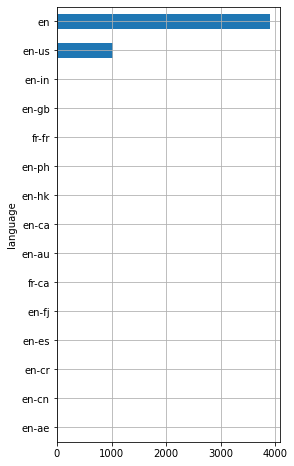

In [23]:
df_5K.groupby(['language']).size().sort_values(ascending=True).plot.barh(figsize=(4,8), grid=True)

<AxesSubplot:ylabel='type'>

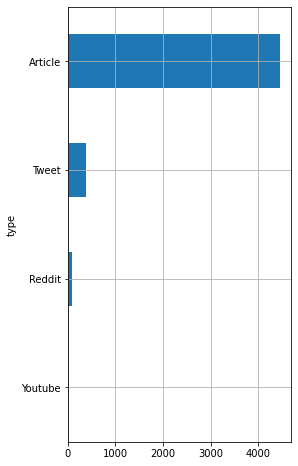

In [24]:
df_5K.groupby(['type']).size().sort_values(ascending=True).plot.barh(figsize=(4,8), grid=True)

In [25]:
df_5K.groupby(['publisheddate']).agg({'publisheddate': [np.min,np.max]}) # retrieve documents earliest and latest published date

publisheddate                          
                                               amin                      amax
publisheddate                                                                
2014-09-26 10:02:00+00:00 2014-09-26 10:02:00+00:00 2014-09-26 10:02:00+00:00
2019-05-16 09:10:18+00:00 2019-05-16 09:10:18+00:00 2019-05-16 09:10:18+00:00
2019-05-16 09:37:36+00:00 2019-05-16 09:37:36+00:00 2019-05-16 09:37:36+00:00
2019-05-16 09:58:52+00:00 2019-05-16 09:58:52+00:00 2019-05-16 09:58:52+00:00
2019-05-16 10:00:00+00:00 2019-05-16 10:00:00+00:00 2019-05-16 10:00:00+00:00
...                                             ...                       ...
2019-09-20 15:12:40+00:00 2019-09-20 15:12:40+00:00 2019-09-20 15:12:40+00:00
2019-09-20 15:15:00+00:00 2019-09-20 15:15:00+00:00 2019-09-20 15:15:00+00:00
2019-09-20 15:23:22+00:00 2019-09-20 15:23:22+00:00 2019-09-20 15:23:22+00:00
2019-09-20 15:30:56+00:00 2019-09-20 15:30:56+00:00 2019-09-20 15:30:56+00:00
2019-09-20 15:40:22+00:00 2019-09-20 15:40:22+00:00 2019-09-20 15:40:22+00:00

[4696 rows x 2 columns]

In [26]:
df_5K.set_index("publisheddate").groupby(pd.Grouper(freq='M')).count()

,signal num,content,regioncountry,audiences,title,sentiment,image,topics,aisummary,likes,...,type,organization,reposts,eocs,retrieveddate,verticals,dislikes,content_str_len,content_raw_words_count,publisheddate_notz
publisheddate,,,,,,,,,,,,,,,,,,,,,
2014-09-30 00:00:00+00:00,1,1,1,0,1,1,1,1,1,0,...,1,0,0,1,1,1,0,1,1,1
2014-10-31 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-11-30 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-12-31 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-31 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-31 00:00:00+00:00,1848,1848,9,0,1848,1848,1741,1847,1835,0,...,1848,0,0,1795,1,1848,0,1848,1848,1848
2019-06-30 00:00:00+00:00,1368,1368,30,0,1368,1368,1253,1314,1366,0,...,1368,0,0,1285,2,1368,0,1368,1368,1368
2019-07-31 00:00:00+00:00,587,587,78,0,587,587,539,558,587,0,...,587,0,0,549,50,587,0,587,587,587


<AxesSubplot:>

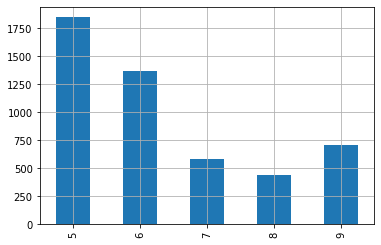

In [27]:
# https://stackoverflow.com/questions/49706852/plot-frequency-of-dates-in-interval-occurred-in-pandas-dataframe

df_5K.loc[df_5K['publisheddate'].dt.month.between(1, 12), 'publisheddate'].dt.month.value_counts().sort_index().plot(kind="bar", grid=True)

# need to comeback and revist this to plot articles published by YYYY-MM x-axis ascending order


In [28]:
raw_content_str_len_max = df_5K['content_str_len'].max()
raw_content_str_len_min = df_5K['content_str_len'].min()
raw_content_words_count_max = df_5K['content_raw_words_count'].max()
raw_content_words_count_min = df_5K['content_raw_words_count'].min()

print(f'Raw content MAX string length: {raw_content_str_len_max}')
print(f'Raw content MIN string length: {raw_content_str_len_min}')
print(f'Raw content MAX words count: {raw_content_words_count_max}')
print(f'Raw content MIN words count: {raw_content_words_count_min}')

Raw content MAX string length: 32757
Raw content MIN string length: 3
Raw content MAX words count: 6124
Raw content MIN words count: 1


# 2. Topic Modeling

## 2.1 Work on 5K data subset with words count greater than 5

In [29]:
# date_cutoff = datetime.datetime(year = 2019, month = 1, day = 1, hour = 0, minute= 0)

# content_selection = df_5K[(df_5K['publisheddate_notz'] >= date_cutoff) & df_5K['content_raw_words_count'] >= 5] # need to debug this to also select newer than Jan 1st 2019

df_content_selection = df_5K[df_5K['content_raw_words_count'] >= 5] # selecting content with 5 or more words

In [30]:
df_content_selection.shape

(4985, 29)

In [31]:
content = df_content_selection.content
content.head()

0    The Trump administration and Consumer Financia...
1    WORKING FAMILIES PARTY. Elizabeth Warren gets ...
2    MSNBC’s Ali Velshi will co-host with Chris Hay...
3    Sen. Elizabeth Warren speaks during the Democr...
4    THE TICKER   Chinese President Xi Jinping and ...
Name: content, dtype: object

In [32]:
# write records to csv
df_content_selection.to_csv('data\\df_q_5K_content_selection.csv')

## 2.2 Preprocess Data Using NLTK

In [33]:
stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    # lemmatize and stem a text
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        # remove stopword tokens and tokens of length smaller than 3
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            # lemmatize and stem tokens
            result.append(lemmatize_stemming(token))
    return result

In [34]:
# preprocess content from 5K raw subset
preprocessed_docs = content.map(preprocess)
preprocessed_docs.head()

# save the model objects - uncomment code below (as needed)
pickle.dump(preprocessed_docs, open("models\\preprocessed_docs.pkl", "wb"))

In [35]:
# example tokens after preprocessing w/ lemmatizing and stemming
preprocessed_docs[preprocessed_docs.index[0]][0:15]

['trump',
 'administr',
 'consum',
 'financi',
 'protect',
 'bureau',
 'cfpb',
 'tuesday',
 'ask',
 'suprem',
 'court',
 'lawsuit',
 'challeng',
 'agenc',
 'justic']

## 2.3 Bag of Words

In [36]:
# BoW dictionary on the dataset
dictionary = gensim.corpora.Dictionary(preprocessed_docs)

In [37]:
# filter out extreme values of word count
# words that appear 10 or less documents, and words that appear more than 50% in the documents, while keeping only the first 100K tokens
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

# print(dictionary)


In [38]:
# save the model objects - uncomment code below (as needed)
pickle.dump(dictionary, open("models\\dictionary.pkl", "wb"))

# load the model objects - uncomment code below (as needed)
# relations_dict = pickle.load(open("relations_dict_5K.pkl", "rb"))

In [39]:
# create corpus using BoW transformation
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

In [40]:
# count word occurence in newly created bow_corpus
word_dict_count = {}
for doc in bow_corpus:
    for i, word_info in enumerate(doc):
        word = dictionary[word_info[0]]
        word_count = word_info[1]
        if word in word_dict_count:
            word_dict_count[word] += word_count
        else:
            word_dict_count[word] = 0

In [41]:
# create word dictionary
word_dict = {'word': list(word_dict_count.keys()), 'count': list(word_dict_count.values())}

In [42]:
# create DataFrame
word_df = pd.DataFrame.from_dict(word_dict)
word_df.shape

(8305, 2)

In [43]:
word_df.sort_values(by=['count'], ascending=False).head()

,word,count
188,sander,8255
39,debat,7162
190,warren,7113
182,poll,7050
72,hous,6563


<AxesSubplot:xlabel='word'>

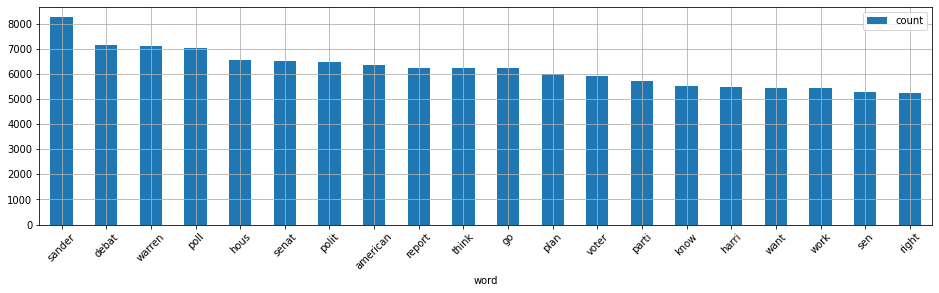

In [44]:
word_df.sort_values(by=['count'], ascending=False).head(20).set_index('word').plot(kind='bar', figsize=(16,4), rot=45, grid=True)

## 2.4 LDA Using BoW

In [45]:
# train LDA model using BoW
lda_bow_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [48]:
def show_model_topics(model, words_per_topic=10):
    for idx, topic in model.show_topics(num_words=words_per_topic, formatted=False):
        print ('Topic {} | Words & Probability: {}'.format(idx+1, topic))

In [49]:
show_model_topics(lda_bow_model, words_per_topic=7)

Topic 1 | Words & Probability: [('sander', 0.009115121), ('warren', 0.008807434), ('debat', 0.0054849647), ('harri', 0.005181448), ('sen', 0.0050809765), ('senat', 0.004776178), ('poll', 0.0044640643)]
Topic 2 | Words & Probability: [('parti', 0.0049218927), ('polit', 0.0048427447), ('go', 0.0044715824), ('hous', 0.0041056685), ('plan', 0.004101895), ('abort', 0.0040751374), ('right', 0.004032151)]
Topic 3 | Words & Probability: [('north', 0.008315624), ('korea', 0.0058949096), ('kim', 0.005031999), ('japan', 0.004953531), ('report', 0.0045973375), ('news', 0.0045037707), ('abe', 0.004052444)]
Topic 4 | Words & Probability: [('hous', 0.005520864), ('american', 0.004329144), ('parti', 0.004213377), ('white', 0.004096125), ('report', 0.003993877), ('impeach', 0.003906838), ('senat', 0.0037764579)]
Topic 5 | Words & Probability: [('poll', 0.010075034), ('debat', 0.008464341), ('harri', 0.0057878825), ('sander', 0.0047931895), ('voter', 0.004634173), ('percent', 0.004507263), ('sen', 0.004

## 2.5 LDA Using TF-IDF

In [50]:
from gensim import corpora, models

# create corpus
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [51]:
# train LDA model using TF-IDF
lda_tfidf_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=2)

# save the model objects - uncomment code below (as needed)
pickle.dump(lda_tfidf_model, open("models\\lda_tfidf_model.pkl", "wb"))

# load the model objects - uncomment code below (as needed)
# relations_dict = pickle.load(open("relations_dict_5K.pkl", "rb"))

In [52]:
show_model_topics(lda_tfidf_model, words_per_topic=7)

Topic 1 | Words & Probability: [('north', 0.0066635585), ('korea', 0.005514855), ('kim', 0.0053898063), ('japan', 0.0038831122), ('missil', 0.0037129452), ('abe', 0.0036917448), ('korean', 0.0035013054)]
Topic 2 | Words & Probability: [('impeach', 0.0032153942), ('climat', 0.0019807713), ('conway', 0.0018704735), ('mueller', 0.0018320954), ('sander', 0.0017301564), ('investig', 0.0016474737), ('mccain', 0.00155891)]
Topic 3 | Words & Probability: [('debat', 0.0030945789), ('poll', 0.0024210033), ('sen', 0.0021821195), ('warren', 0.0021056412), ('sander', 0.0017835307), ('fundrais', 0.0017719874), ('harri', 0.0017635145)]
Topic 4 | Words & Probability: [('debat', 0.0029143875), ('blasio', 0.0024099108), ('poll', 0.0018751677), ('citi', 0.0018203993), ('cancer', 0.0017664746), ('buttigieg', 0.0017157142), ('mayor', 0.0016851884)]
Topic 5 | Words & Probability: [('abort', 0.0031304948), ('climat', 0.0026564803), ('obama', 0.0019152928), ('plan', 0.0018898549), ('health', 0.0017467056), ('

## 2.6 Testing a Random Content

### 2.6.1 Random Sample Content - Test Against BoW Model

In [53]:
sample = content[df_5K.index[137]]
print(sample)

WASHINGTON (AP) — Democratic leaders in Congress argue that impeaching President Donald Trump is a political mistake as the 2020 election nears.
Most of the candidates in the 2020 White House race seem to agree, for now.
Fewer than one-third of the 23 Democrats vying for the nomination are out with calls to start the impeachment process, citing evidence in special counsel Robert Mueller’s report that they believe shows Trump obstructed justice.
Most others, including leading contenders Joe Biden and Bernie Sanders, have stopped short.
That reluctance from the party’s presidential candidates, even as more congressional Democrats start pushing their leaders toward impeachment, underscores the risky politics of investigating the president for “high crimes and misdemeanors.”
Impeachment matters deeply to the party’s base, but remains unpopular with most Americans.
Copyright © 2019 The Associated Press. All rights reserved. This material may not be published, broadcast, written or redistrib

In [54]:
txt = dictionary.doc2bow(preprocess(sample))

In [55]:
# Classify sample document using LDA BoW model
for index, score in sorted(lda_bow_model[txt], reverse=True):
    print('\nScore: {}\t \nTopic: {}'.format(score, lda_bow_model.print_topic(index, 7)))


Score: 0.9882852435112	 
Topic: 0.006*"hous" + 0.004*"american" + 0.004*"parti" + 0.004*"white" + 0.004*"report" + 0.004*"impeach" + 0.004*"senat"


### 2.6.2 Random Sample Content - Test Against TFIDF Model

In [56]:
# Classify sample document using LDA TF-IDF model
for index, score in sorted(lda_tfidf_model[txt], reverse=True):
    print('\nScore: {}\t \nTopic: {}'.format(score, lda_tfidf_model.print_topic(index, 7)))


Score: 0.9882820248603821	 
Topic: 0.003*"impeach" + 0.002*"climat" + 0.002*"conway" + 0.002*"mueller" + 0.002*"sander" + 0.002*"investig" + 0.002*"mccain"


### 2.6.3 Test Against Unseen Language

In [57]:
# input unseen text
unseen_document = 'Speaker Pelosi leaves the U.S. Capitol to have an immediate meeting with the President to keep pressing our allies on the issues related to North Korea.'

In [58]:
# Using LDA BoW trained model
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_bow_model[bow_vector], key=lambda tup: tup[1], reverse=True):
    print('Score: {}\t Topic: {}'.format(score, lda_bow_model.print_topic(index, 7)))

Score: 0.9370092153549194	 Topic: 0.008*"north" + 0.006*"korea" + 0.005*"kim" + 0.005*"japan" + 0.005*"report" + 0.005*"news" + 0.004*"abe"
Score: 0.01588866300880909	 Topic: 0.006*"hous" + 0.004*"american" + 0.004*"parti" + 0.004*"white" + 0.004*"report" + 0.004*"impeach" + 0.004*"senat"
Score: 0.015782883390784264	 Topic: 0.005*"parti" + 0.005*"polit" + 0.004*"go" + 0.004*"hous" + 0.004*"plan" + 0.004*"abort" + 0.004*"right"
Score: 0.015676112845540047	 Topic: 0.010*"poll" + 0.008*"debat" + 0.006*"harri" + 0.005*"sander" + 0.005*"voter" + 0.005*"percent" + 0.004*"sen"
Score: 0.015643123537302017	 Topic: 0.009*"sander" + 0.009*"warren" + 0.005*"debat" + 0.005*"harri" + 0.005*"sen" + 0.005*"senat" + 0.004*"poll"


In [61]:
# here - ba 2/10


# Using LDA TF-IDF trained model
for index, score in sorted(lda_tfidf_model[bow_vector], key=lambda tup: tup[1], reverse=True):
    print("Score: {}\t Topic: {}".format(score, lda_tfidf_model.print_topic(index, 7)))

Score: 0.5883190035820007	 Topic: 0.007*"north" + 0.006*"korea" + 0.005*"kim" + 0.004*"japan" + 0.004*"missil" + 0.004*"abe" + 0.004*"korean"
Score: 0.36439573764801025	 Topic: 0.003*"debat" + 0.002*"poll" + 0.002*"sen" + 0.002*"warren" + 0.002*"sander" + 0.002*"fundrais" + 0.002*"harri"
Score: 0.015828771516680717	 Topic: 0.003*"impeach" + 0.002*"climat" + 0.002*"conway" + 0.002*"mueller" + 0.002*"sander" + 0.002*"investig" + 0.002*"mccain"
Score: 0.015753040090203285	 Topic: 0.003*"debat" + 0.002*"blasio" + 0.002*"poll" + 0.002*"citi" + 0.002*"cancer" + 0.002*"buttigieg" + 0.002*"mayor"
Score: 0.015703454613685608	 Topic: 0.003*"abort" + 0.003*"climat" + 0.002*"obama" + 0.002*"plan" + 0.002*"health" + 0.002*"women" + 0.002*"hyde"


## 2.7 Visualization

### 2.7.1 LDA BoW Model

In [62]:
import pyLDAvis.gensim_models

In [63]:
pyLDAvis.enable_notebook()

lda_display = pyLDAvis.gensim_models.prepare(lda_bow_model, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\anaconda3\envs\ba-cpstn\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


### 2.7.2 LDA TF-IDF Model

In [64]:
lda_tfidf_display = pyLDAvis.gensim_models.prepare(lda_tfidf_model, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_tfidf_display)

C:\anaconda3\envs\ba-cpstn\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [65]:
pyLDAvis.save_html(lda_tfidf_display, 'models\\pyLDAvis_lda_tfidf_display.html')

# 3. Entities Relationships

In [66]:
import spacy
from spacy import displacy 
nlp = spacy.load('en_core_web_sm')

## 3.1 Extraction of Entities

In [67]:
txt = df_5K['content'][0][:1000] # select the text from the first content article and limit text length to first 1000 characters

In [68]:
doc = nlp(txt) # making use of spacy nlp method

In [69]:
print('| INPUT TEXT | :', txt, '| LENGTH | :', len(txt))

| INPUT TEXT | : The Trump administration and Consumer Financial Protection Bureau (CFPB) on Tuesday asked the Supreme Court to take up a lawsuit challenging the agency’s constitutionality.Top Justice Department and CFPB attorneys argued in a brief filed Tuesday that the structure of the powerful financial watchdog infringes on the president’s executive authority. The lawyers urged the Supreme Court to take up a case that could have potentially fatal implications for the CFPB, halting or weakening its efforts to police the financial sector.“The structure of the Bureau, including the for-cause restriction on the removal of its single director, violates the Constitution’s separation of powers,” wrote the administration's attorneys, asking the Supreme Court to take up the lawsuit, Selia Law v. CFPB, from the 5th Circuit Court of Appeals.The brief is the latest step taken by the Trump administration and Republicans to gut the CFPB and sideline what Democrats designed to be a powerful, inde

In [70]:
print('| OUTPUT | : ', [(x.text, x.label_) for x in doc.ents])

| OUTPUT | :  [('Trump', 'ORG'), ('Consumer Financial Protection Bureau', 'ORG'), ('Tuesday', 'DATE'), ('the Supreme Court', 'ORG'), ('Top Justice Department', 'ORG'), ('CFPB', 'ORG'), ('Tuesday', 'DATE'), ('the Supreme Court', 'ORG'), ('CFPB', 'ORG'), ('Bureau', 'ORG'), ('Constitution', 'LAW'), ('the Supreme Court', 'ORG'), ('Selia Law', 'PERSON'), ('Trump', 'PERSON'), ('Republicans', 'NORP'), ('CFPB', 'ORG'), ('Democrats', 'NORP')]


## 3.2 Entities Visualization

In [71]:
displacy.render(doc, style='ent', jupyter=True)

C:\anaconda3\envs\ba-cpstn\lib\site-packages\spacy\displacy\__init__.py:65: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## 3.3 Extract Dependecies

In [72]:
def filter_spans(spans):
    sorted_spans = spacy.util.filter_spans(spans)
    result = []
    seen_tokens = set()
    for span in sorted_spans:
        if span.start not in seen_tokens and span.end-1 not in seen_tokens:
            result.append(span)
        seen_tokens.update(range(span.start, span.end))
    result = sorted(result, key=lambda span: span.start)
    return result

In [73]:
def extract_entity_relations(doc, relation_types):
    spans = list(doc.ents) + list(doc.noun_chunks)
    spans = filter_spans(spans)
    with doc.retokenize() as retokenizer:
        for span in spans:
            retokenizer.merge(span)
    
    relations = []
    for relation_type in relation_types:
        for entity in filter(lambda w: w.ent_type_ == relation_type, doc):
            if entity.dep_ in ('attr', 'dobj'):
                subject = [w for w in entity.head.lefts if w.dep_ == 'nsubj']
                if subject:
                    subject = subject[0]
                    relations.append((subject, entity))
                elif entity.dep_ == 'pobj' and entity.head.dep_ == 'prep':
                    relations.append(entity.head.dep_, entity)
    return relations

In [74]:
relations = extract_entity_relations(doc, ['PERSON'])
print(relations)

[]


In [75]:
if relations:
    for r1, r2 in relations:
        print(f"{r1.text} -> {r2.text} ({r2.ent_type_})")

In [76]:
relations_dict = {"noun_phrase": [], "entity": [], "entity_type": []}

In [77]:
relations_dict = {'noun_phrase': [], 'entity': [], 'entity_type': []}
for contnt in content:
    doc = nlp(contnt)
    relations = extract_entity_relations(doc, ['PERSON', 'GPE'])
    if relations:
        for r1, r2 in relations:
            relations_dict['noun_phrase'].append(r1.text)
            relations_dict['entity'].append(r2.text)
            relations_dict['entity_type'].append(r2.ent_type_)

# runtime of approximately 13min for 5K in js lenovo

In [78]:
# save the model objects - uncomment code below (as needed)
pickle.dump(relations_dict, open("models\\relations_dict.pkl", "wb"))

# load the model objects - uncomment code below (as needed)
# relations_dict = pickle.load(open("relations_dict_5K.pkl", "rb"))

In [79]:
relations_df = pd.DataFrame.from_dict(relations_dict)

In [80]:
relations_df.head()

,noun_phrase,entity,entity_type
0,that,Bernie Sanders,PERSON
1,who,Lighthizer,PERSON
2,The White House,Ian Kullgren,PERSON
3,who,Lighthizer,PERSON
4,The White House,Ian Kullgren,PERSON


In [82]:
relations_df.shape

(7708, 3)

In [81]:
# write records to csv
relations_df.to_csv('models\\relations_df.csv')

In [83]:
relations_df.loc[relations_df['noun_phrase'] == 'Biden']

,noun_phrase,entity,entity_type
161,Biden,California Senator Kamala Harris,PERSON
163,Biden,Kim,PERSON
174,Biden,Harris,PERSON
188,Biden,Afghanistan,GPE
189,Biden,former British prime ministers Margaret Thatcher,PERSON
...,...,...,...
7435,Biden,Kim,PERSON
7566,Biden,Pennsylvania,GPE
7686,Biden,Thurmond,PERSON
7692,Biden,his native Pennsylvania,GPE


## 3.4 Most Popular Subjects (by frequency of noun_phrase)

<AxesSubplot:ylabel='noun_phrase'>

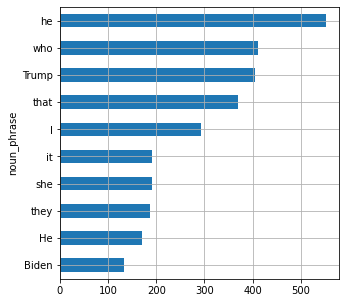

In [126]:
relations_df.groupby(['noun_phrase']).size().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(5,5), grid=True)

<AxesSubplot:ylabel='entity'>

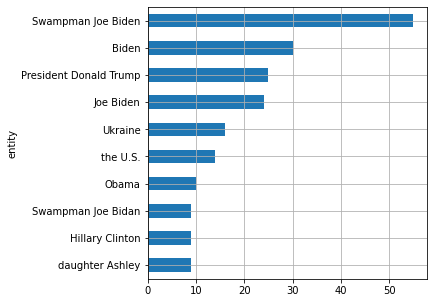

In [85]:
relations_df[relations_df['noun_phrase']=='he'].groupby(['entity']).size().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(5,5), grid=True)

## 3.5 Most Popular Subjects (by frequency of entity)

<AxesSubplot:ylabel='entity'>

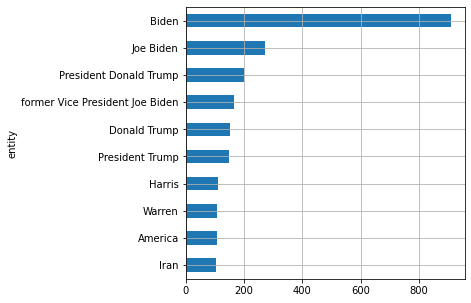

In [86]:
relations_df.groupby(['entity']).size().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(5,5), grid=True)

<AxesSubplot:ylabel='noun_phrase'>

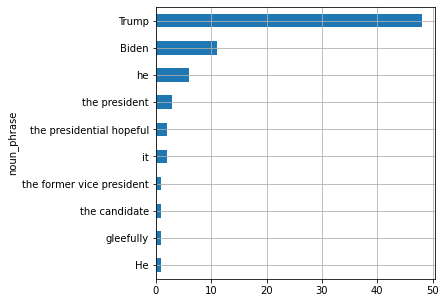

In [87]:
relations_df[relations_df.entity=='Kim'].groupby(['noun_phrase']).size().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(5,5), grid=True)

# 4 Knowledge Graphs

## 4.1 KG Data Processing

### 4.1.1 Split Content Into Phrases

In [88]:
phrases = []
for contnt in content: # using the first 5000 contents
    phrases_all = contnt.split('.')
    phrases_filtered = [p.strip() for p in phrases_all if p.strip() and len(p.strip()) > 3]
    phrases += phrases_filtered

print(phrases[:10])
print(len(phrases))

['The Trump administration and Consumer Financial Protection Bureau (CFPB) on Tuesday asked the Supreme Court to take up a lawsuit challenging the agency’s constitutionality', 'Top Justice Department and CFPB attorneys argued in a brief filed Tuesday that the structure of the powerful financial watchdog infringes on the president’s executive authority', 'The lawyers urged the Supreme Court to take up a case that could have potentially fatal implications for the CFPB, halting or weakening its efforts to police the financial sector', "“The structure of the Bureau, including the for-cause restriction on the removal of its single director, violates the Constitution’s separation of powers,” wrote the administration's attorneys, asking the Supreme Court to take up the lawsuit, Selia Law v", 'CFPB, from the\xa05th Circuit Court of Appeals', 'The brief is the latest step taken by the Trump administration and Republicans to gut the CFPB and sideline what Democrats designed to be a powerful, ind

In [89]:
from textacy.extract import subject_verb_object_triples

In [90]:
doc = nlp('The government is manufacturing illegal vehicles in North Korea') # example extraction of SVOtriples for one sentence
iterator = subject_verb_object_triples(doc)
for it in iterator:
    print(it)

SVOTriple(subject=[government], verb=[is, manufacturing], object=[vehicles])


### 4.1.2 Extract SVO Triples from Data Subset 

In [91]:
from tqdm import tqdm # allows for display of operation progress bar

In [92]:
triples_raw = []

for p in tqdm(phrases):
    iterator = subject_verb_object_triples(nlp(p))
    phrase_triples = []
    for svo in iterator:
        phrase_triples.append(svo)
    triples_raw.append(phrase_triples)

# takes 40 min to run in js lenovo

100%|██████████| 212108/212108 [30:14<00:00, 116.90it/s]


### 4.1.3 Lemmatize & Stem SVO Triples

In [93]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus.reader.wordnet import VERB

In [94]:
lemmatizer = WordNetLemmatizer()
lemmatized_triples = []
lemmatized_stemmed_triples = []

In [95]:
stemmer = SnowballStemmer('english')

In [96]:
def lemmatize_stem(text):
    # first lemmatize and then stem text
    return stemmer.stem(WordNetLemmatizer().lemmatize(text))

In [97]:
phrase_counter = 0
found_triples_counter = 0

for (phrase, phrase_triples) in zip(phrases, triples_raw):
    # print('phrase triples:', phrase_triples)
    if len(phrase) > 0:
        phrase_counter += 1
    if phrase_triples:
        found_triples_counter += 1
        for triple in phrase_triples:
            # print('raw triples:', triple)
            # lemmatize
            s = lemmatizer.lemmatize(str(triple[0]))
            o = lemmatizer.lemmatize(str(triple[2]))
            v = lemmatizer.lemmatize(str(triple[1][-1]), VERB)  # take last token in verb expression
            
            # lemmatize & stem
            lss = lemmatize_stem(str(triple[0]))
            lso = lemmatize_stem(str(triple[2]))
            lsv = lemmatize_stem(str(triple[1][-1]))
            
            # print('lemmatized: s:', s, ', o:', o, ', v:', v)
            # print('lemmatized&stemmed: s:', lss, ', o:', lso, ', v:', lsv)
            
            lemmatized_triples.append([s.lower(), v.lower(), o.lower()])
            lemmatized_stemmed_triples.append([lss.lower(), lsv.lower(), lso.lower()])
    else:
        # print('Could not detect triples in phrase:', phrase)
        lemmatized_triples.append([])
        lemmatized_stemmed_triples.append([])

In [102]:
# save the model objects - uncomment code below (as needed)
pickle.dump(found_triples_counter, open("models\\found_triples_counter.pkl", "wb"))
pickle.dump(phrase_counter, open("models\\phrase_counter.pkl", "wb"))
pickle.dump(lemmatized_triples, open("models\\lemmatized_triples.pkl", "wb"))
pickle.dump(lemmatized_stemmed_triples, open("models\\lemmatized_stemmed_triples.pkl", "wb"))

# load the model objects - uncomment code below (as needed)
# found_triples_counter = pickle.load(open("found_triples_counter_5K.pkl", "rb"))
# phrase_counter = pickle.load(open("phrase_counter_5K.pkl", "rb"))
# lemmatized_triples = pickle.load(open("lemmatized_triples_5K.pkl", "rb"))
# lemmatized_stemmed_triples = pickle.load(open("lemmatized_stemmed_triples_5K.pkl", "rb"))

In [99]:
print('Triples Detection Rate:', round((found_triples_counter/phrase_counter) * 100, 2), '%')

Triples Detection Rate: 55.1 %


## 4.2 Creation of KG

In [100]:
sources = []
relations = []
targets = []

for ep_item in lemmatized_stemmed_triples:
    # check found items are not empty
    if ep_item:
        # print(ep_item)
        # append source/relation/target
        sources.append(ep_item[0])
        relations.append(ep_item[1])
        targets.append(ep_item[2])

In [103]:
kg_df_5K = pd.DataFrame({'source': sources, 'target': targets, 'edge': relations})
kg_df_5K.tail()

,source,target,edge
177120,[candidate],[digits],reach
177121,[biden],[field],top
177122,[he],[time],receiv
177123,[question],[field],ask
177124,[candidate],[digits],hit


### 4.2.1 Top Subjects (Source)

In [104]:
# write records to csv
kg_df_5K.to_csv('models\\kg_df_5K.csv')

<AxesSubplot:>

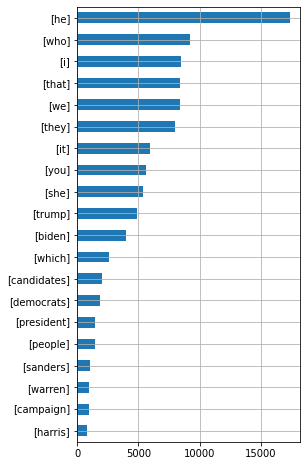

In [128]:
kg_df_5K.source.value_counts()[0:20].sort_values().plot.barh(figsize=(4,8), grid=True)

### 4.2.2 Top Objects (Targets)

<AxesSubplot:>

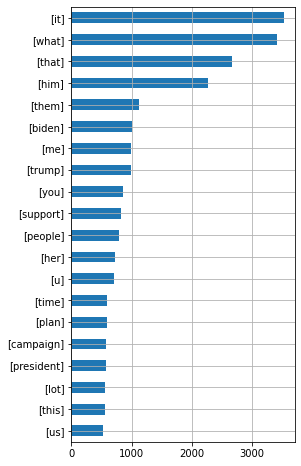

In [106]:
kg_df_5K.target.value_counts()[:20].sort_values().plot.barh(figsize=(4,8), grid=True)

### 4.2.3 Top Verbs (Edge/Relations)

<AxesSubplot:>

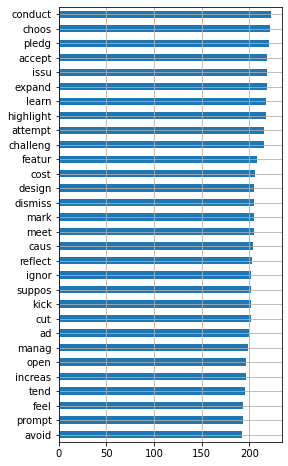

In [107]:
kg_df_5K.edge.value_counts()[170:200].sort_values().plot.barh(figsize=(4,8), grid=True)

## 4.3 Creation of NetworkX KG

In [108]:
import networkx as nx
# create a directed graph from a Pandas dataframe
G = nx.from_pandas_edgelist(kg_df_5K, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

In [132]:
selected_nodes = [n for (n, v, e) in G.edges(data=True) if (e['edge'] in ['meet'])]

In [133]:
SG = G.subgraph(selected_nodes)

In [134]:
def plot_graph(graph):
    plt.figure(figsize=(8,8))
    pos = nx.spring_layout(graph, k=0.5)  # k regulates the distance between nodes
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=800, edge_cmap=plt.cm.Blues, pos=pos)
    plt.show()

In [135]:
nx_SG_d1 = nx.dfs_tree(SG, source='[trump]', depth_limit=1)
nx_SG_d2 = nx.dfs_tree(SG, source='[trump]', depth_limit=2)
nx_SG_d3 = nx.dfs_tree(SG, source='[trump]', depth_limit=3)

#### Depth 1

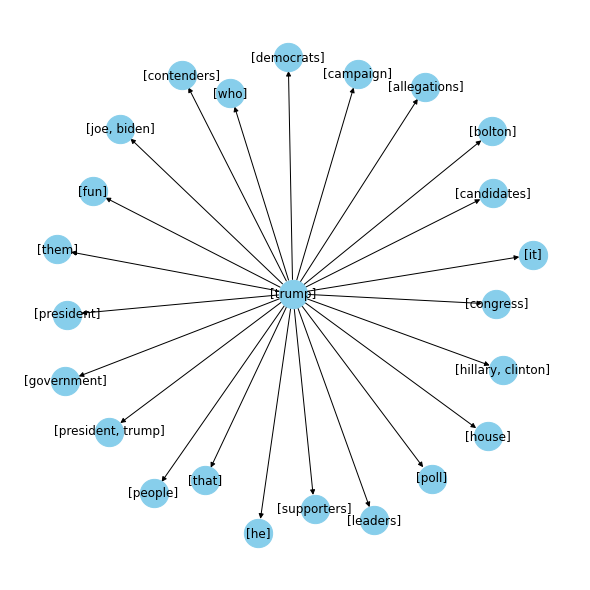

In [117]:
plot_graph(nx_SG_d1)

#### Depth 2

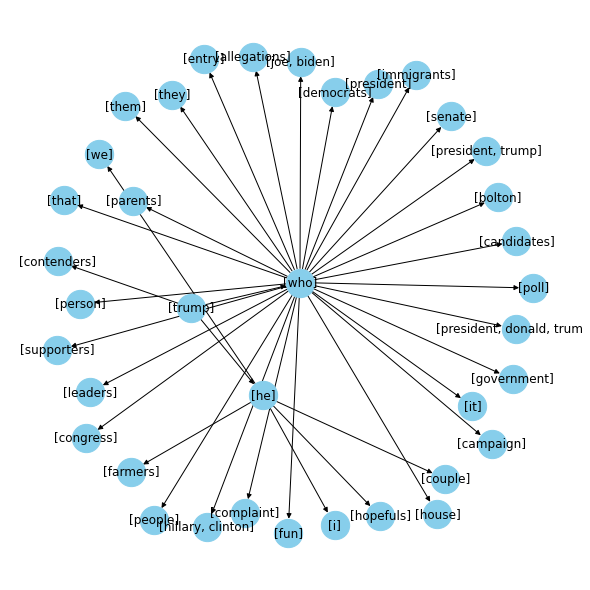

In [137]:
plot_graph(nx_SG_d2)

### Depth 3

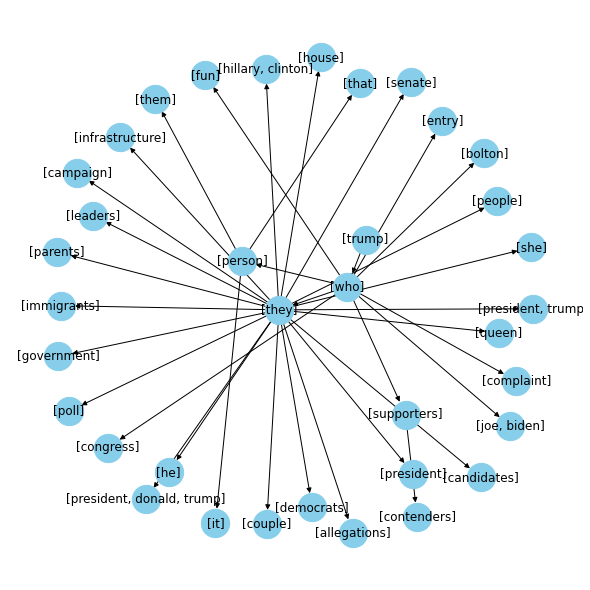

In [138]:
plot_graph(nx_SG_d3)

In [120]:
type(nx_SG_d3)

networkx.classes.digraph.DiGraph